In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import warnings
warnings.filterwarnings("ignore")

In [2]:
## read the file
arabica_coffee = pd.read_csv('arabica_data_cleaned.csv')

In [3]:
def see_shape(df:pd.DataFrame)->tuple:
    """this function returns a tuple containing the shape of the dataframe and
    the list of columns contained in the dataframe"""
    shape = df.shape
    cols_list = df.columns
    return shape, cols_list
see_shape(arabica_coffee)  

((1311, 44),
 Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
        'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
        'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
        'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
        'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
        'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
        'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
        'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
        'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
        'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
       dtype='object'))

In [4]:
## list of columns to be dropped
dropped_cols = ['Unnamed: 0', 'Species', 'Owner', 'Lot.Number', 'ICO.Number', 'Company', 'Altitude',
                'Producer', 'Bag.Weight', 'In.Country.Partner', 'Grading.Date', 'Owner.1',
                'Clean.Cup', 'Uniformity', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
                'Quakers', 'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Address',
                'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters']


def drop_cols(df:pd.DataFrame, cols:list)->pd.DataFrame:
    """this function drops unwanted columns from a dataframe and returns
    a dataframe with the remaining columns"""
    df.drop(cols, axis='columns', inplace=True)
    return df

In [5]:
## checking for missing values
arabica_coffee.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [6]:
def drop_nulls(df:pd.DataFrame)->pd.DataFrame:
    """this function drops missing along the rows of
    the dataframe. It returns a dataframe free of missing values"""
    df.dropna(axis='rows', inplace=True)
    return df

In [7]:
## editing the text in column names
def rename_cols(df:pd.DataFrame)->pd.DataFrame:
    df.columns = [ name.lower().replace('.', '_') for name in df.columns]
    return df   

In [8]:
## manipulating columns of string and categorical data types
def alter_text(df:pd.DataFrame)->pd.DataFrame:
    return df.assign(farm_name = lambda df:df['farm_name'].str.capitalize().astype('string'),
                   region = lambda df:df['region'].str.capitalize().astype('string'),
                   mill = lambda df:df['mill'].str.capitalize().str.replace('.', ' ').astype('string'),
                   country_of_origin = lambda df:df['country_of_origin'].str.replace('Tanzania, United Republic Of', 'Tanzania').astype('string'),
                   harvest_year = lambda df:df['harvest_year'].str.split('/', 1, expand=True)[0].astype('int16'),
                   variety = lambda df:df['variety'].astype('string'),
                   certification_body = lambda df:df['certification_body'].astype('string'),
                   processing_method = lambda df:df['processing_method'].astype('category')
                   )

In [9]:
## manipulating columns of numeric data types
def alter_numeric(df:pd.DataFrame)->pd.DataFrame:
    return df.assign(number_of_bags = lambda df:df['number_of_bags'].astype('int16'),
                   aroma = lambda df:df['aroma'].astype('float16'),
                   flavor = lambda df:df['flavor'].astype('float16'),
                   aftertaste = lambda df:df['aftertaste'].astype('float16'),
                   acidity = lambda df:df['acidity'].astype('float16'),
                   body = lambda df:df['body'].astype('float16'),
                   balance = lambda df:df['balance'].astype('float16'),
                   sweetness = lambda df:df['sweetness'].astype('float16'),
                   cupper_points = lambda df:df['cupper_points'].astype('float16')
                    )

In [10]:
key_col = 'harvest_year'
def sort_reset(df:pd.DataFrame, key_col:str)->pd.DataFrame:
    """this function returns a dataframe that has been sorted by a given
    input key column and set that key column as the index of the dataframe"""
    return df.set_index(key_col).sort_values(key_col, axis=0)

In [11]:
## creating a dataframe from a series of manipulation operations
arabica_coffee = arabica_coffee.pipe(drop_cols, 
                                     dropped_cols).pipe(drop_nulls).pipe(rename_cols
                                                                        ).pipe(alter_text).pipe(alter_numeric).pipe(sort_reset, key_col)

In [12]:
arabica_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 2011 to 2018
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country_of_origin     743 non-null    string  
 1   farm_name             743 non-null    string  
 2   mill                  743 non-null    string  
 3   region                743 non-null    string  
 4   number_of_bags        743 non-null    int16   
 5   variety               743 non-null    string  
 6   processing_method     743 non-null    category
 7   aroma                 743 non-null    float16 
 8   flavor                743 non-null    float16 
 9   aftertaste            743 non-null    float16 
 10  acidity               743 non-null    float16 
 11  body                  743 non-null    float16 
 12  balance               743 non-null    float16 
 13  sweetness             743 non-null    float16 
 14  cupper_points         743 non-null    float16 
 15  ce

In [13]:
## Examining measures of central tendency
arabica_coffee[['number_of_bags', 'aroma', 'flavor', 'aftertaste', 
                'acidity', 'body', 'balance', 'sweetness', 'cupper_points', 'altitude_mean_meters']].describe()

,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,sweetness,cupper_points,altitude_mean_meters
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,152.355316,7.542969,7.476562,7.343750,7.492188,7.460938,7.457031,9.921875,7.429688,1925.198994
std,127.352304,0.286377,0.316162,0.326904,0.296143,0.269287,0.338623,0.466064,0.402588,10576.736261
min,1.000000,6.328125,6.171875,6.171875,6.078125,6.328125,6.078125,1.330078,5.171875,1.000000
25%,16.500000,7.328125,7.328125,7.171875,7.328125,7.328125,7.250000,10.000000,7.250000,1100.000000
50%,150.000000,7.500000,7.500000,7.328125,7.500000,7.500000,7.500000,10.000000,7.500000,1300.000000
75%,275.000000,7.671875,7.671875,7.578125,7.671875,7.671875,7.671875,10.000000,7.671875,1500.000000
max,550.000000,8.750000,8.671875,8.500000,8.578125,8.421875,8.578125,10.000000,8.578125,190164.000000


#### Possible Outlier:
- In the altitude column, there's an unusual value(190164 meters altitude), which is logically unrealistic.
  By the use of the interquartile range method we will eliminate observations whose altitudes exceeds the 3rd
  quartile by 1.5 times the interquartile range or whose altitudes lie below the 1st quartile by 1.5 times the interquartile
  range

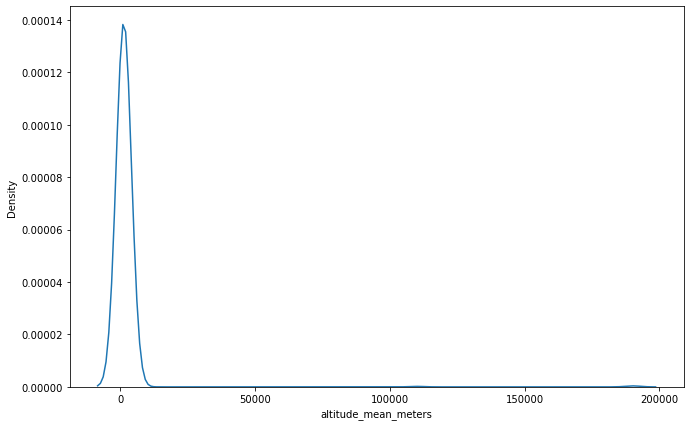

In [14]:
fig, ax = plt.subplots(figsize=(11,7))
sns.kdeplot(arabica_coffee['altitude_mean_meters'], data=arabica_coffee)
plt.show()

In [15]:
def drop_outliers(df:pd.DataFrame)->pd.DataFrame:
    """this function enables elimination of outliers using the
    interquartile range method"""
## first and third quartiles    
    Q1, Q3  = np.percentile(df['altitude_mean_meters'], [25, 75])
## interquartile range    
    IQR = Q3 - Q1
## upper limit     
    upper_bound = Q3 + (1.5*IQR)
## lower limit    
    lower_bound = Q1 - (1.5*IQR)
    df = (df[(df['altitude_mean_meters'] > lower_bound) &
                    (df['altitude_mean_meters'] < upper_bound)])
    return df

In [16]:
arabica_coffee = drop_outliers(arabica_coffee)

In [17]:
## this is a dictionary showing the different aggregations to be performed on different columns
agg_dict = {'cupper_points':'mean',
           'altitude_mean_meters':'mean',
           'number_of_bags':'mean',
           'flavor':'mean', 'aroma':'mean',
           'aftertaste':'mean', 'acidity':'mean',
           'body':'mean', 'balance':'mean', 'sweetness':'mean'}

## this is a list of columns by which the dataframe will be grouped by
columns = ['country_of_origin', 'region', 'mill', 'variety']

##column to sort the groupby object by
sortby_col = 'cupper_points'

def create_groups(df:pd.DataFrame, 
                  column:str, 
                  agg_dict:dict,
                 sortby_col:str):
    """this function creates a groupby object based on the given grouping column(s).The
    groupby object is then sorted by the given input sortby_col column"""
        return df.groupby(column).agg(agg_dict).sort_values(sortby_col,ascending=False).reset_index()

In [18]:
by_country = create_groups(df=arabica_coffee, column='country_of_origin',
                           agg_dict=agg_dict, sortby_col=sortby_col)
by_region = create_groups(df=arabica_coffee, column='region',
                          agg_dict=agg_dict, sortby_col=sortby_col)
by_mill = create_groups(df=arabica_coffee, column='mill', agg_dict=agg_dict, sortby_col=sortby_col)
by_variety = create_groups(df=arabica_coffee, column=['variety'],
                           agg_dict=agg_dict, sortby_col=sortby_col)
by_processing_method = create_groups(df=arabica_coffee,column='processing_method',
                                    agg_dict=agg_dict, sortby_col=sortby_col)

In [19]:
by_processing_method

,processing_method,cupper_points,altitude_mean_meters,number_of_bags,flavor,aroma,aftertaste,acidity,body,balance,sweetness
0,Pulped natural / honey,7.593750,1293.125000,129.125000,7.562500,7.585938,7.625000,7.562500,7.636719,7.593750,10.000000
1,Natural / Dry,7.589844,1192.434210,191.028571,7.601562,7.605469,7.445312,7.546875,7.558594,7.562500,9.945312
2,Semi-washed / Semi-pulped,7.531250,1189.939394,109.424242,7.539062,7.554688,7.414062,7.492188,7.531250,7.582031,9.921875
3,Washed / Wet,7.394531,1342.972299,150.472486,7.457031,7.539062,7.316406,7.496094,7.441406,7.433594,9.921875
4,Other,7.312500,1187.530435,124.869565,7.468750,7.480469,7.343750,7.425781,7.429688,7.476562,9.828125


In [20]:
by_variety

,variety,cupper_points,altitude_mean_meters,number_of_bags,flavor,aroma,aftertaste,acidity,body,balance,sweetness
0,Ethiopian Yirgacheffe,8.125000,1875.000000,250.000000,8.000000,8.125000,7.875000,8.000000,7.828125,8.000000,10.000000
1,Sumatra,7.921875,1350.000000,110.000000,7.835938,7.625000,7.789062,8.085938,7.914062,7.875000,10.000000
2,Peaberry,7.921875,1800.000000,100.000000,7.828125,7.828125,7.828125,7.750000,7.578125,7.828125,10.000000
3,Arusha,7.750000,1400.000000,300.000000,7.500000,7.671875,7.328125,7.250000,7.578125,7.750000,10.000000
4,SL14,7.746094,1725.000000,112.500000,7.718750,7.906250,7.589844,7.695312,7.660156,7.640625,10.000000
5,SL34,7.691406,1700.000000,223.333333,7.636719,7.667969,7.527344,7.781250,7.640625,7.667969,10.000000
6,Catimor,7.679688,1410.500000,47.900000,7.652344,7.679688,7.500000,7.574219,7.597656,7.652344,10.000000
7,Mandheling,7.664062,1375.000000,200.000000,7.546875,7.625000,7.414062,7.625000,7.664062,7.664062,10.000000
8,Sulawesi,7.578125,1500.000000,2.000000,7.578125,7.500000,7.421875,7.578125,7.578125,7.500000,10.000000
9,Ruiru 11,7.578125,1400.000000,5.000000,7.671875,7.750000,7.578125,7.671875,7.671875,7.578125,10.000000


In [21]:
by_country

,country_of_origin,cupper_points,altitude_mean_meters,number_of_bags,flavor,aroma,aftertaste,acidity,body,balance,sweetness
0,Ethiopia,8.164062,1872.375000,255.000000,8.140625,8.046875,7.976562,8.101562,7.843750,8.054688,10.000000
1,Rwanda,8.000000,1900.000000,150.000000,7.921875,7.828125,7.750000,7.828125,7.750000,7.750000,9.328125
2,Burundi,7.828125,1880.000000,220.000000,7.671875,7.750000,7.328125,7.500000,7.500000,7.750000,10.000000
3,Thailand,7.750000,1312.500000,216.250000,7.644531,7.605469,7.625000,7.566406,7.707031,7.667969,10.000000
4,Uganda,7.730469,1690.421053,145.000000,7.722656,7.886719,7.574219,7.675781,7.640625,7.621094,10.000000
5,Vietnam,7.691406,1258.571429,1.428571,7.476562,7.476562,7.296875,7.437500,7.632812,7.546875,10.000000
6,Costa Rica,7.652344,1465.789474,212.894737,7.535156,7.671875,7.527344,7.550781,7.511719,7.625000,9.984375
7,China,7.648438,1463.125000,3.437500,7.625000,7.640625,7.484375,7.578125,7.574219,7.546875,9.914062
8,United States (Puerto Rico),7.648438,853.440000,17.750000,7.539062,7.648438,7.480469,7.601562,7.664062,7.648438,9.828125
9,Panama,7.644531,1515.000000,134.250000,7.625000,7.667969,7.605469,7.703125,7.582031,7.875000,10.000000


In [22]:
by_region

,region,cupper_points,altitude_mean_meters,number_of_bags,flavor,aroma,aftertaste,acidity,body,balance,sweetness
0,Guji-hambela,8.578125,2075.0,300.0,8.585938,8.500000,8.375000,8.539062,8.421875,8.375000,10.0
1,"Snnp/kaffa zone,gimbowereda",8.500000,1822.5,50.0,8.578125,8.078125,8.500000,8.500000,7.671875,8.421875,10.0
2,West and central valley,8.421875,1300.0,250.0,7.828125,8.171875,8.000000,8.078125,7.828125,8.000000,10.0
3,Gedio,8.328125,1850.0,250.0,8.171875,8.171875,8.000000,8.171875,8.078125,8.328125,10.0
4,Kapchorwa eastern,8.171875,1950.0,100.0,8.171875,8.421875,8.171875,8.171875,7.828125,7.921875,10.0
...,...,...,...,...,...,...,...,...,...,...,...
231,Ocosingo,6.578125,1200.0,100.0,6.921875,7.171875,6.671875,6.828125,7.250000,7.750000,10.0
232,Tlatlauquitepec,6.578125,800.0,10.0,6.921875,6.921875,6.921875,6.921875,7.171875,7.000000,10.0
233,Bali,6.296875,1250.0,84.0,7.789062,7.789062,7.414062,7.625000,7.671875,7.578125,10.0
234,Kiambu,6.250000,1550.0,175.0,7.328125,7.085938,7.250000,7.335938,7.625000,7.500000,10.0


In [23]:
by_mill

,mill,cupper_points,altitude_mean_meters,number_of_bags,flavor,aroma,aftertaste,acidity,body,balance,sweetness
0,Metad plc,8.578125,2075.0,300.0,8.585938,8.500000,8.375000,8.539062,8.421875,8.375000,10.0
1,La herradura,8.578125,1320.0,14.0,8.250000,8.171875,8.171875,8.000000,7.828125,8.171875,10.0
2,Tulla coffee farm,8.500000,1822.5,50.0,8.578125,8.078125,8.500000,8.500000,7.671875,8.421875,10.0
3,"Exclusive coffees s a,",8.421875,1300.0,250.0,7.828125,8.171875,8.000000,8.078125,7.828125,8.000000,10.0
4,Echo coffee mill,8.421875,1450.0,3.0,8.250000,8.421875,8.078125,8.171875,7.921875,8.000000,10.0
...,...,...,...,...,...,...,...,...,...,...,...
341,Beneficio de café tecoxolco s de r l de c v,6.500000,1200.0,100.0,6.421875,6.921875,6.171875,7.328125,7.250000,6.750000,10.0
342,"Tlamatoca, hutusco, ver",6.421875,1800.0,25.0,6.671875,6.500000,6.421875,7.171875,7.328125,6.500000,10.0
343,Pt olam indonesia,6.375000,1225.0,233.0,7.703125,7.585938,7.414062,7.625000,7.835938,7.789062,10.0
344,Jing jing café 晶晶坊青山咖啡教室,6.289062,719.0,15.0,7.460938,7.539062,7.421875,7.539062,7.664062,7.539062,10.0


In [24]:
def make_regplot(df, col_x:str, col_y:str, title:str):
    """creates a regression plot for the given input input variables.
    :col_x defines the variables that falls on the x axis in the plot
    :col_y defines the variables that falls on the y axis in the plot
    :title defines the text to be used as the title of the plot"""
    fig, ax = plt.subplots(figsize=(10,7))
    sns.set(rc={'axes.facecolor':'#000000', 'figure.facecolor':'#000000'})

    palette = []
    font = {'family':'sans',
            'color':'white',
            'weight':'bold',
            'size':12
           }
    
    sns.regplot(x=col_x, y=col_y,
            data=df, color='#FF9F29')
##formatting text for the plot's title    
    ax.set_title(str.title(title), fontdict=font)
    
##formatting text for x and y labels    
    ax.set_xlabel(col_x.replace('_', ' '), fontdict=font)
    ax.set_ylabel(col_y.replace('_', ' '), fontdict=font)
    
## setting tick frequency    
    plt.xticks(np.arange(500,2200,200))
    plt.yticks(np.arange(5,10,0.5))
    
## editing the appearance of tick labels    
    ax.tick_params(axis='both', labelcolor='white')
    
##setting the direction labels on the x axis face    
    plt.xticks(rotation=60)
    
## editing which spines can be seen in the plot    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
## setting grid lines to be unseen    
    plt.grid(visible=None)
    

### Which is the most optimal altitude for a good coffee flavor profile?

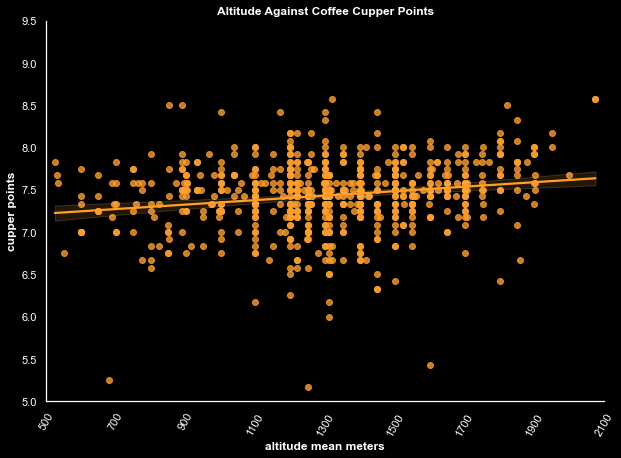

In [37]:
## list of titles to be used in the following plots
title = ['altitude against coffee cupper points',
        'altitude against coffee flavor',
        'altitude against coffee aroma']

## defining which columns fall on which axes in the plot
x = 'altitude_mean_meters'
y = ['cupper_points', 'flavor', 'aroma']

make_regplot(arabica_coffee, x, y[0], title[0])

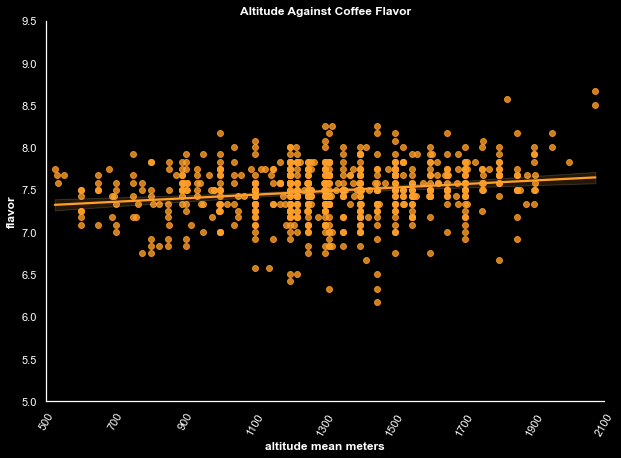

In [26]:
make_regplot(arabica_coffee, x, y[1], title[1])

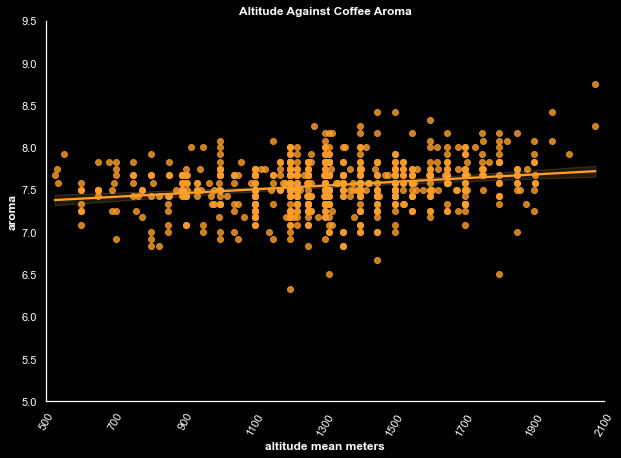

In [27]:
make_regplot(arabica_coffee, x, y[2], title[2])

#### Insight:
- From the plots above, we see that a range of 1500 to 2000 meters gives a relatively better
  coffee flavor profile. This is considering that a score of above 8 out of 10 indicates a good profile

In [28]:
def make_barplot(df, col_x:str, col_y:str, title:str):
    """creates a bar-plot for the given input input variables.
    :col_x defines the variables that falls on the x axis in the plot
    :col_y defines the variables that falls on the y axis in the plot
    :title defines the text to be used as the title of the plot"""
    fig, ax = plt.subplots(figsize=(10,7))
    sns.set(rc={'axes.facecolor':'#000000', 'figure.facecolor':'#000000'})

    palette = []
    font = {'family':'sans',
            'color':'white',
            'weight':'bold',
            'size':12
           }
    
    sns.barplot(x=col_x, y=col_y,
            data=df, color='#FF9F29', order=list(df[col_y].unique()))
##formatting text for the plot's title    
    ax.set_title(str.title(title), fontdict=font)
    
##formatting text for x and y labels    
    ax.set_xlabel(col_x.replace('_', ' '), fontdict=font)
    ax.set_ylabel(col_y.replace('_', ' '), fontdict=font)
    

    
## editing the appearance of tick labels    
    ax.tick_params(axis='both', labelcolor='white')
    
## editing which spines can be seen in the plot    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
## setting grid lines to be unseen    
    plt.grid(visible=None)

### Which coffee varieties have better flavor profiles?

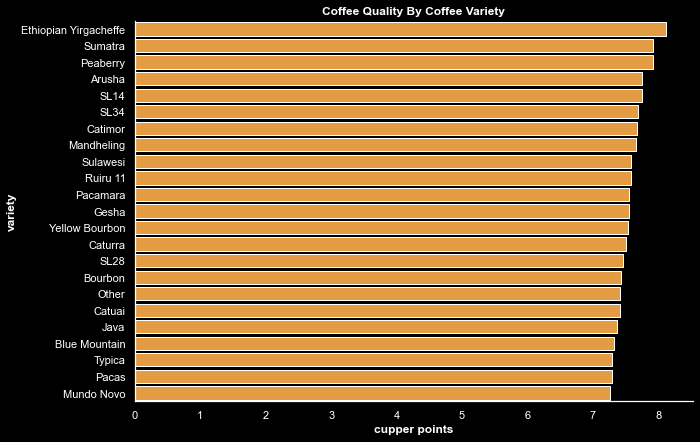

In [29]:
make_barplot(df=by_variety,
            col_x='cupper_points',
            col_y='variety',
            title='coffee quality by coffee variety')

In [30]:
## grouping by coffee variety and country of origin
country_and_variety = create_groups(df=arabica_coffee,
                                 column=['variety', 'country_of_origin'],
                                 agg_dict=agg_dict,   
                                 sortby_col=sortby_col
                                )
country_and_variety.iloc[:10, :4]

,variety,country_of_origin,cupper_points,altitude_mean_meters
0,Other,Ethiopia,8.351562,1955.625
1,Sumatra,Taiwan,8.171875,1200.000
2,Ethiopian Yirgacheffe,Ethiopia,8.125000,1875.000
3,Bourbon,Taiwan,8.000000,1000.000
4,Gesha,Panama,8.000000,1600.000
5,Bourbon,Rwanda,8.000000,1900.000
6,Caturra,Vietnam,8.000000,1295.000
7,Peaberry,Kenya,7.921875,1800.000
8,Gesha,Ethiopia,7.835938,1703.250
9,Catimor,Thailand,7.832031,1250.000


###   Insight:
- Coffee varieties with East African and Far East Asian roots appear to produce coffee with relatively
  better quality.
- These high ranking varieties grow at altitudes of between 1200 to 2000 meters above sea level which backs
  our previous findings

### Which coffee varieties produced the highest volumes of coffee?

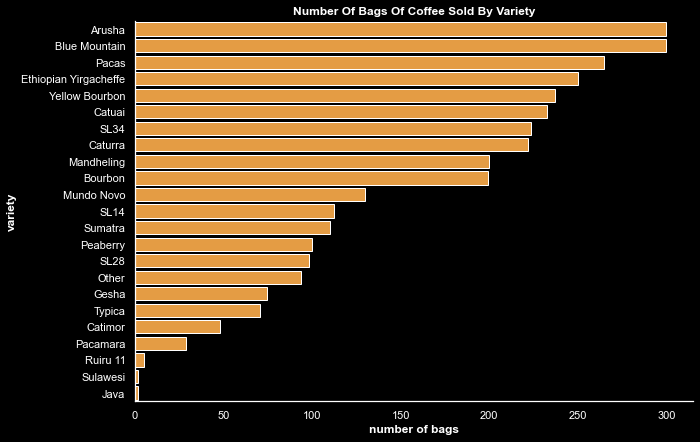

In [31]:
sorted_bags = by_variety.sort_values(by=['number_of_bags'], ascending=False).reset_index(drop=True)

make_barplot(df=sorted_bags,
            col_x='number_of_bags',
            col_y='variety',
            title='number of bags of coffee sold by variety')

### Insight:
- Arusha and Blue Mountain varieties had the most number of coffee bags sold

### Which processing method produces coffee of relatively better quality?

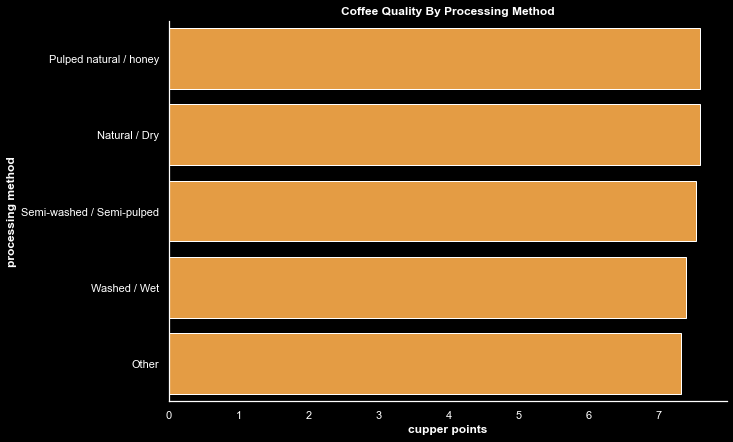

In [32]:
make_barplot(df=by_processing_method,
            col_x='cupper_points',
            col_y='processing_method',
            title='coffee quality by processing method')

### Insight:
- Natural drying/Sun-drying and Natural pulping appear to give a relatively higher quality end product
  in terms of coffee

### Which countries produced higher quality coffee?

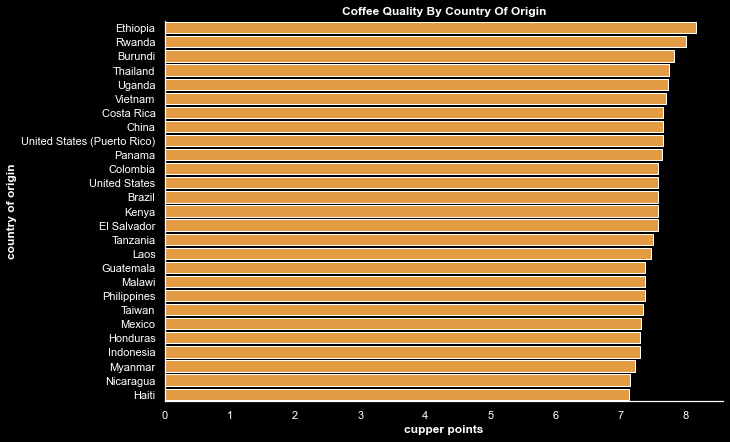

In [33]:
make_barplot(df=by_country,
            col_x='cupper_points',
            col_y='country_of_origin',
            title='coffee quality by country of origin')

### Insight:
- Looking at the top ten countries, we can observe that coffee with East African and South American
  roots is likely to have relatively better quality